In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


### Загружаем данные 

In [3]:
df_bp = pd.read_excel("C:/Users/user/mgtu/data_set/X_bp.xlsx",index_col=0)
df_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [4]:
df_nup = pd.read_excel("C:/Users/user/mgtu/data_set/X_nup.xlsx",index_col=0)
df_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.000000,57.000000
1.0,0.0,4.000000,60.000000
2.0,0.0,4.000000,70.000000
3.0,0.0,5.000000,47.000000
4.0,0.0,5.000000,57.000000
...,...,...,...
1035.0,90.0,8.088111,47.759177
1036.0,90.0,7.619138,66.931932
1037.0,90.0,9.800926,72.858286
1038.0,90.0,10.079859,65.519479


In [5]:
# Объединенный датасэт
df = df_nup.join(df_bp,  how='inner')

In [6]:
df

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,0.0,4.000000,57.000000,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,0.0,4.000000,60.000000,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,0.0,4.000000,70.000000,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,0.0,5.000000,47.000000,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,0.0,5.000000,57.000000,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,90.0,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,90.0,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,90.0,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,90.0,6.313201,58.261074,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


### Анализ данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность п

In [8]:
# Количество уникальных значений в каждом столбце
df.nunique()

Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [9]:
# 10 уникальных значений в столбцах
for column in df.columns:
    print(f'Колонка {column}')
    print(sorted(df[column].unique())[-10:])

Колонка Угол нашивки, град
[0.0, 90.0]
Колонка Шаг нашивки
[13.3748547768973, 13.378772113231, 13.4849451024425, 13.5719207023593, 13.6539870540166, 13.732404403383, 14.0332153037961, 14.0513828180002, 14.3764512763632, 14.4405218753969]
Колонка Плотность нашивки
[85.6609961909375, 85.9871737934485, 86.0124270098611, 88.0724895050505, 88.8076471500205, 89.8766155103646, 92.0421393826707, 92.9634919477473, 98.2026027528147, 103.988901301494]
Колонка Соотношение матрица-наполнитель
[5.11078055270228, 5.12036847803355, 5.21044243868871, 5.25889457769596, 5.29584199270212, 5.3141436851035, 5.42513947440363, 5.45295943131032, 5.45556617827335, 5.59174159869754]
Колонка Плотность, кг/м3
[2160.0, 2160.75143947764, 2161.56521646388, 2170.34236302043, 2172.24679646503, 2182.75182183283, 2184.49319952038, 2192.29763744164, 2192.73878348, 2207.77348061119]
Колонка модуль упругости, ГПа
[1542.1684576617, 1543.02368299018, 1546.29088574472, 1572.09604227992, 1588.67721742116, 1615.09697286127, 1628

In [10]:
# смотрим пропуски
df.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [11]:
#статистика 
df.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,44.252199,6.899222,57.153929,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,45.015793,2.563467,12.350969,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.000000,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,0.000000,5.080033,49.799212,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,0.000000,6.916144,57.341920,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,90.000000,8.586293,64.944961,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,90.000000,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


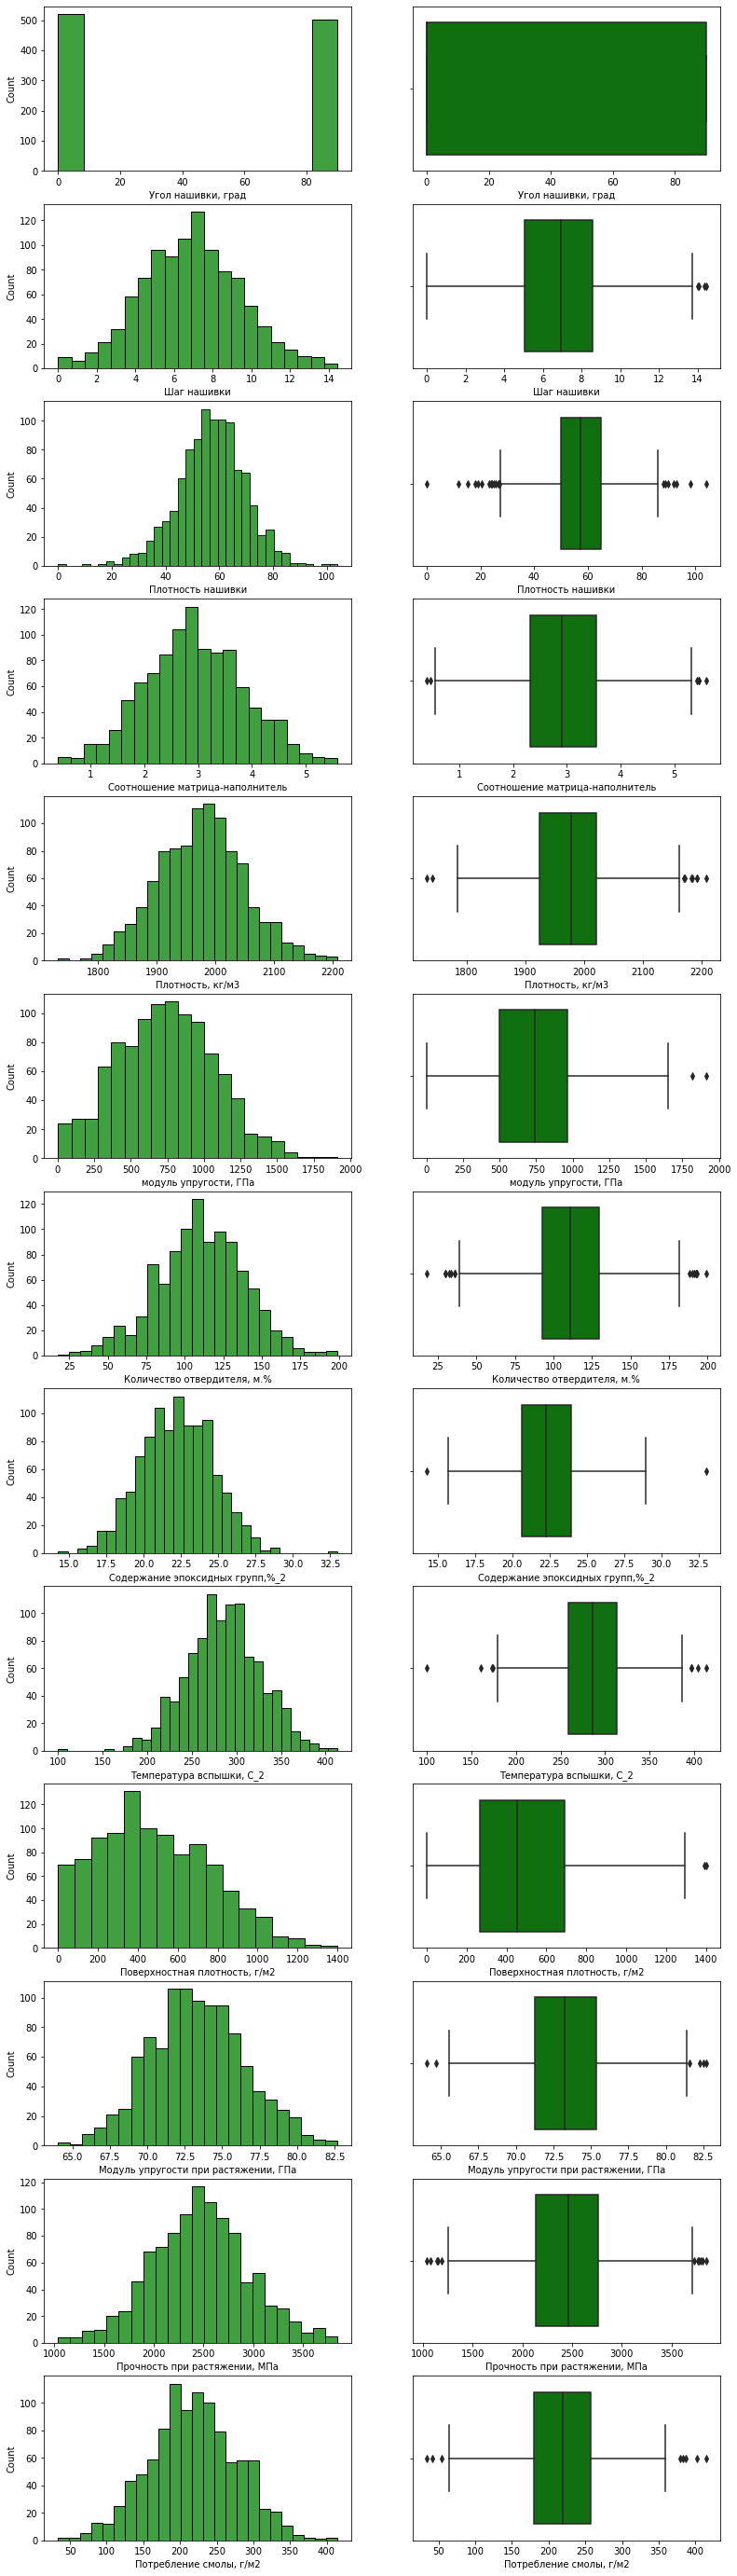

In [12]:
# графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 50))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, ax=axes[k, 0], color='green')
    sns.boxplot(data=df, x=column, ax=axes[k, 1], color='green')
plt.show()

Для большинства характеристик распределение близко к нормальному
По диаграммам Ящик с усами наблюдаем наличие выбросов по всем характеристикам, кроме Угла нашивки
Угол нашивки, град - дискретное распределение, так как колонка содержит всего два уникальных значения.Можно использовать как бинарный признак.


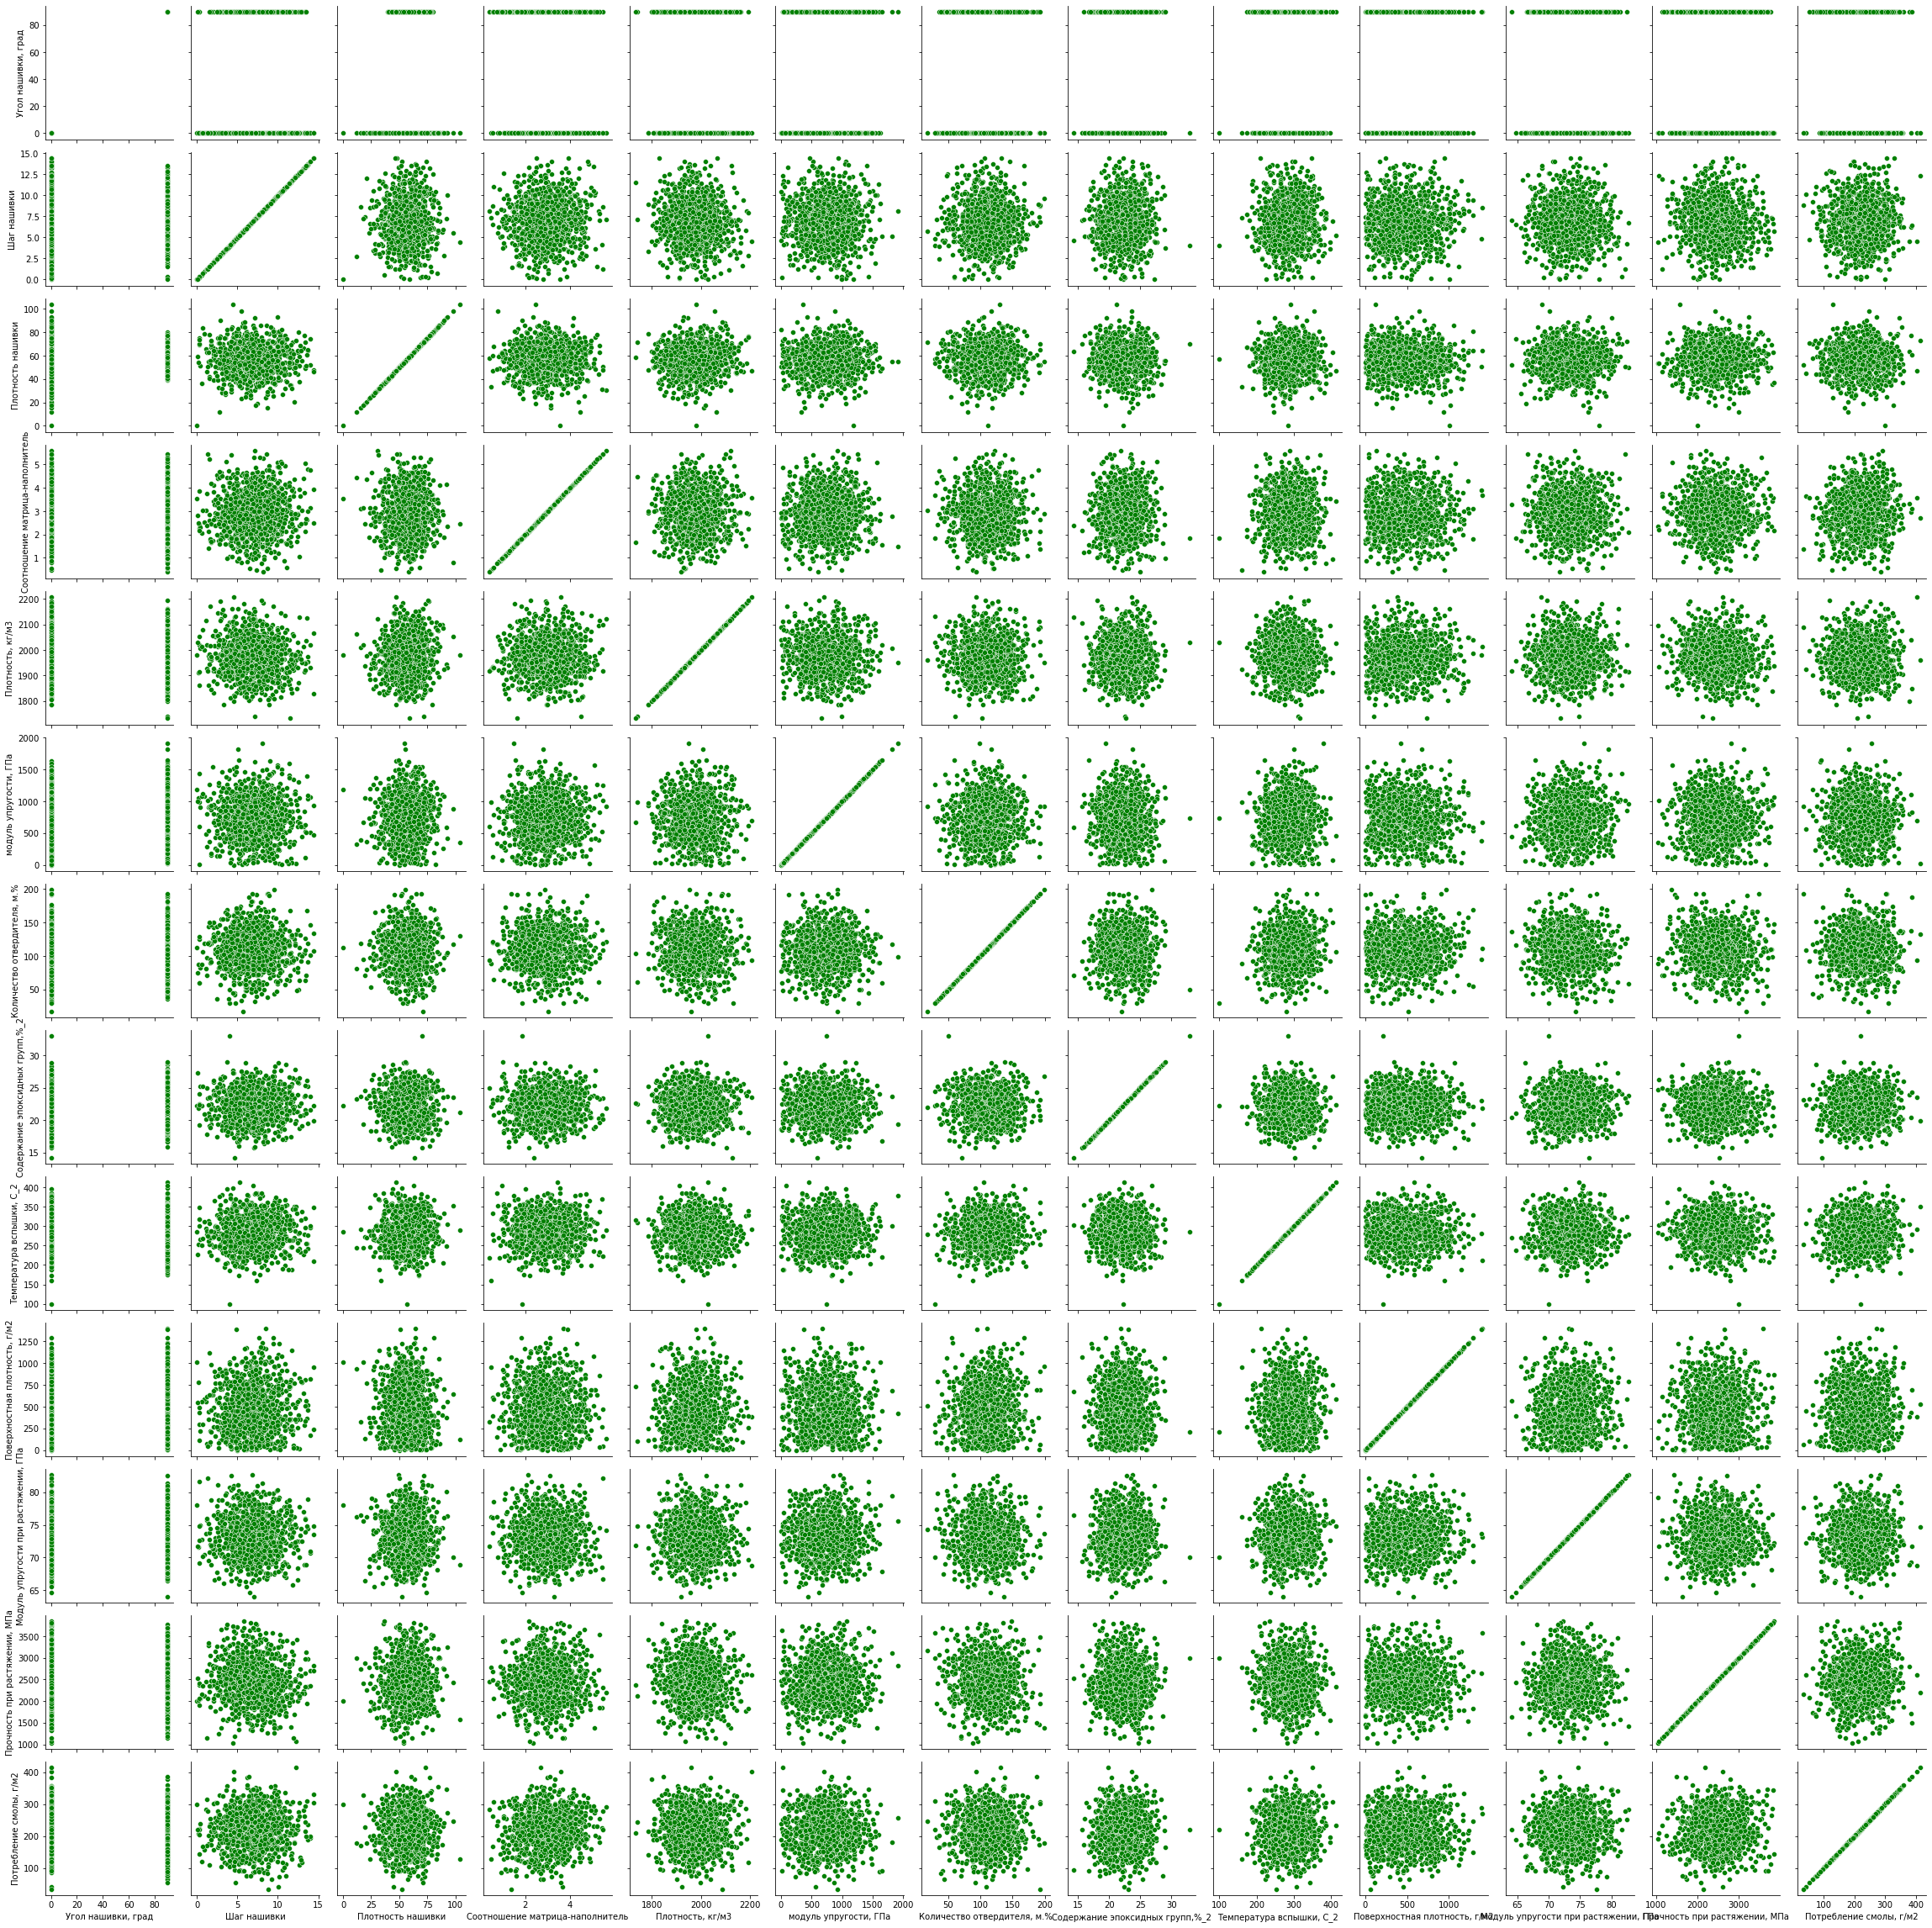

In [13]:
# попарные графики рассеяния
columns = df.columns
g = sns.PairGrid(df[columns])
g.map(sns.scatterplot, color ='green')

очень не информативно

In [14]:
#коэффициент корреляции
df.corr()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
"Угол нашивки, град",1.000000,0.023616,0.107947,-0.031073,-0.068474,-0.025417,0.038570,0.008052,0.020695,0.052299,0.023003,0.023398,-0.015334
Шаг нашивки,0.023616,1.000000,0.003487,0.036437,-0.061015,-0.009875,0.014887,0.003022,0.025795,0.038332,-0.029468,-0.059547,0.013394
Плотность нашивки,0.107947,0.003487,1.000000,-0.004652,0.080304,0.056346,0.017248,-0.039073,0.011391,-0.049923,0.006476,0.019604,0.012239
Соотношение матрица-наполнитель,-0.031073,0.036437,-0.004652,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531
"Плотность, кг/м3",-0.068474,-0.061015,0.080304,0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937
"модуль упругости, ГПа",-0.025417,-0.009875,0.056346,0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840
"Количество отвердителя, м.%",0.038570,0.014887,0.017248,-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446
"Содержание эпоксидных групп,%_2",0.008052,0.003022,-0.039073,0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165
"Температура вспышки, С_2",0.020695,0.025795,0.011391,-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954
"Поверхностная плотность, г/м2",0.052299,0.038332,-0.049923,-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692


<AxesSubplot:>

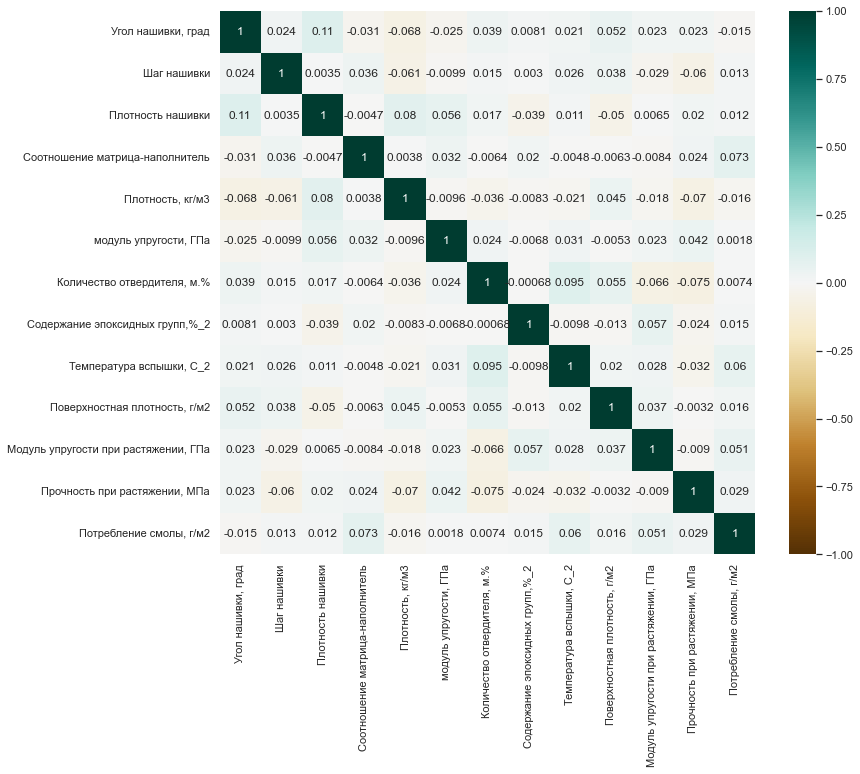

In [15]:
# Тепловая карта коэффициентов корреляции
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'BrBG')

Очень слабые прямые и обратные связи переменных в датасете. 
Это предобработанный датасэт с синтетическими данными.

Найду выбросы.
Для поиска выбросов использую метод 3-х сигм.

In [16]:
count_3s = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    score = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = score.abs() > 3
    count_3s += d['3s'].sum()

print('Метод 3-х сигм, выбросов:', count_3s)

Метод 3-х сигм, выбросов: 24


In [17]:
# Удалю выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    score = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (score.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

количество строк уменишьлось до 1000. Возможно я удалила как раз настоящие данные, а не синтетические, что очень печально.

### Нормализация данных

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [19]:
mms = MinMaxScaler()
df_norm = pd.DataFrame(mms.fit_transform(df), columns=df.columns, index=df.index)


In [20]:
df_norm.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.496000,0.477193,0.507027,0.489568,0.467648,0.447024,0.496427,0.493216,0.488654,0.371301,0.497322,0.507902,0.512370
std,0.500234,0.177586,0.163634,0.174687,0.178696,0.198876,0.171089,0.179818,0.174792,0.215155,0.167158,0.172506,0.170432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.351886,0.405037,0.370964,0.340831,0.302576,0.384097,0.368597,0.371985,0.206374,0.386234,0.390414,0.401220
50%,0.000000,0.477999,0.509730,0.484284,0.472347,0.448525,0.495388,0.492154,0.488205,0.348844,0.492609,0.504890,0.513653
75%,1.000000,0.593714,0.612766,0.608289,0.579727,0.582408,0.613258,0.624396,0.606271,0.535295,0.605138,0.612932,0.625772
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Модель для прогноза модуля упругости при растяжении

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [22]:
df_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

Удалим из датасета прогнозируемую переменную. И разделим выборку на тестовую и обучающую выборки, в соответствии с условием задачи (30/70)

In [23]:
X = df_norm.drop('Модуль упругости при растяжении, ГПа', axis=1)
y = df_norm['Модуль упругости при растяжении, ГПа']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Случайный лес

При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

In [25]:
random_forest = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [60, 80, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 80}

In [26]:
model_RFR_1 = GSCV.best_estimator_

In [27]:
model_RFR_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=80,
                      random_state=42)

### Градиентный бустинг

In [28]:
gradient_boosted = GradientBoostingRegressor()
param_grid_gb = {
   'n_estimators': [20, 40, 60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5],
    'min_samples_leaf':[1, 2, 4],
    'min_samples_split':[2, 4, 6]
}
GSCVgb = GridSearchCV(estimator=gradient_boosted, param_grid=param_grid_gb, cv=10, verbose=0)
GSCVgb.fit(X_train, y_train)
GSCVgb.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 20}

In [29]:
model_GB_1 = GSCVgb.best_estimator_

In [30]:
model_GB_1.fit(X_train, y_train)

GradientBoostingRegressor(max_features='log2', min_samples_split=4,
                          n_estimators=20)

### K - ближайших соседей

In [31]:
KNN = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 25)
             }
GSCVKNN = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=10, verbose=0)
GSCVKNN.fit(X_train, y_train)
GSCVKNN.best_params_

{'n_neighbors': 24}

In [32]:
model_KNN_1 = GSCVKNN.best_estimator_

In [33]:
model_KNN_1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=24)

### Линейная регрессия

In [34]:
model_LN_1 = LinearRegression()
model_LN_1.fit(X_train, y_train)
y_pred = model_LN_1.predict(X_test)

## Модель для прогноза прочности при растяжении

In [35]:
X = df_norm.drop('Прочность при растяжении, МПа', axis=1)
y = df_norm['Прочность при растяжении, МПа']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Случайный лес

In [37]:
random_forest = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [60, 80, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 60}

In [38]:
model_RFR_2 = GSCV.best_estimator_

In [39]:
model_RFR_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=60,
                      random_state=42)

### Градиентный бустинг

In [40]:
gradient_boosted = GradientBoostingRegressor(random_state = 42)
param_grid_gb = {
    'n_estimators': [20, 40, 60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5],
    'min_samples_leaf':[1, 2, 4],
    'min_samples_split':[2, 4, 6]
}
GSCVgb = GridSearchCV(estimator=gradient_boosted, param_grid=param_grid_gb, cv=10, verbose=0)
GSCVgb.fit(X_train, y_train)
GSCVgb.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 20}

In [41]:
model_GB_2 = GSCVgb.best_estimator_

In [42]:
model_GB_2.fit(X_train, y_train)

GradientBoostingRegressor(max_features='auto', min_samples_leaf=2,
                          min_samples_split=6, n_estimators=20,
                          random_state=42)

### K - ближайших соседей

In [43]:
KNN = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 25)
             }
GSCVKNN = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=10, verbose=0)
GSCVKNN.fit(X_train, y_train)
GSCVKNN.best_params_

{'n_neighbors': 23}

In [44]:
model_KNN_2 = GSCVKNN.best_estimator_

In [45]:
model_KNN_2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=23)

### Линейная регрессия

In [46]:
model_LN_2 = LinearRegression()
model_LN_2.fit(X_train, y_train)


LinearRegression()

### Посмотрим что получлось

In [47]:
def get_metrics(model):
    predicted = model.predict(X_test)
    return (
            mean_absolute_error(predicted, y_test), 
            r2_score(predicted, y_test)
           )
                      
models_res = [get_metrics(model_RFR_1), get_metrics(model_GB_1), get_metrics(model_KNN_1), get_metrics(model_LN_1),
              get_metrics(model_RFR_2), get_metrics(model_GB_2), get_metrics(model_KNN_2),  get_metrics(model_LN_2)]
res_data = {'наименование модели': ['Случайный лес_МУ', 'Градиентный бустинг_МУ', 'К соседей_МУ', 'Линейная регрессия_МУ', 
                                    'Случайный лес_ПР', 'Градиентный бустинг_ПР', 'К соседей_ПР', 'Линейная регрессия_ПУ'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'r2_score'  : [model_res[1] for model_res in models_res]
       }
pd.DataFrame(res_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- М

,наименование модели,mean_absolute_error,r2_score
0,Случайный лес_МУ,0.144007,-241.823329
1,Градиентный бустинг_МУ,0.144544,-65.560076
2,К соседей_МУ,0.146184,-23.223745
3,Линейная регрессия_МУ,0.145125,-43.538655
4,Случайный лес_ПР,0.145951,-176.576341
5,Градиентный бустинг_ПР,0.145694,-39.990494
6,К соседей_ПР,0.146513,-26.181760
7,Линейная регрессия_ПУ,0.147455,-34.854171


## Нейросеть для рекомендации соотношение матрица-наполнитель

In [48]:
df = df.reset_index(drop=True)
X = df.drop('Соотношение матрица-наполнитель', axis=1)
y = df['Соотношение матрица-наполнитель']

In [49]:
X

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,4.000000,60.000000,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
1,0.0,5.000000,47.000000,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
2,0.0,5.000000,57.000000,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
3,0.0,5.000000,60.000000,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
4,0.0,5.000000,70.000000,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
995,90.0,9.076380,47.019770,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
996,90.0,10.565614,53.750790,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
997,90.0,4.161154,67.629684,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
998,90.0,6.313201,58.261074,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [50]:
y

0      1.857143
1      1.857143
2      2.771331
3      2.767918
4      2.569620
         ...   
995    2.271346
996    3.444022
997    3.280604
998    3.705351
999    3.808020
Name: Соотношение матрица-наполнитель, Length: 1000, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[  44.639996    6.910599   57.27629  1975.4022    738.6754    110.82191
    22.23555   285.9573    479.8558     73.31816  2464.864     218.254   ]]


In [53]:
import datetime

In [54]:
def mod(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(200, activation='sigmoid'),
        layers.Dropout(0.6),
      layers.Dense(20, activation='sigmoid'),
      layers.Dense(10, activation='sigmoid'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001))
    return model

In [55]:
ns_model = mod(normalizer)
ns_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 200)               2600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                4020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                        

In [56]:
%%time
history = ns_model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    verbose=0, epochs=20)

Wall time: 1.96 s


In [57]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE [MPG]')
    plt.legend()
    plt.grid(True)

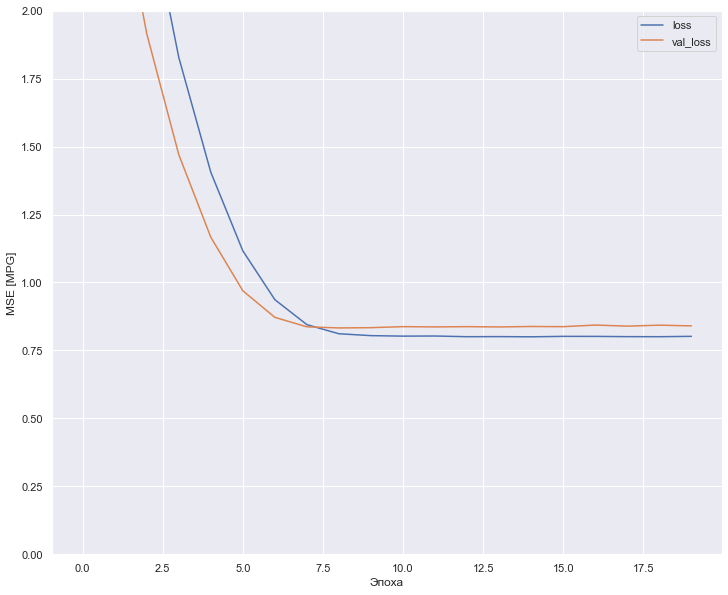

In [58]:
plot_loss(history)

In [59]:
ns_model.save("C:/Users/user/Desktop/Настя/МГТУ/VKR_Dolmatova/model/model")

NameError: name 'dnn_ns_model' is not defined

In [ ]:
model2 = keras.models.load_model("C:/Users/user/Desktop/Настя/МГТУ/VKR_Dolmatova/model/model")

In [ ]:
model2

In [ ]:
model2.summary()